In [1]:
import numpy as np
import nibabel as nb
import sys
import os
import yaml
import matplotlib.pyplot as plt
import gurobipy as gp
%matplotlib widget 
from mpl_toolkits.mplot3d import Axes3D

sys.path.append("/home/mehdii/projects/def-vidalthi/mehdii/3DPU_Plateau_Problem")

from src.PU3D_project._3DLoops._3dpu_using_dfs import *
from src.PU3D_project.Block_edges.block_edges import *
import src.PU3D_project.ROMEO.romeo.utils as romeo
import src.PU3D_project.MIP_constraints.Python as MIP
import src.PU3D_project.utils as utils

## Create a data set or extract it

In [2]:
config = yaml.safe_load(open("/home/mehdii/projects/def-vidalthi/mehdii/3DPU_Plateau_Problem/paths.yaml"))

In [3]:
path_data = config["paths"]["phase_data"]
data_brut = nb.load(path_data)
t = 1
phase = data_brut.get_fdata()[:,:,:,t]

In [4]:
shape = phase.shape
i1,i2,j1,j2,k1,k2 = 0, 50, 0, 50, 0, 20
phase = phase[i1:i2,j1:j2,k1:k2]

# Use our Method on it

*Detect the loops*

In [5]:
C = Resiuals(phase)
C.create_loops(separate=False,num_workers = 5)

100%|██████████| 1089/1089 [00:00<00:00, 554185.52it/s]


40


100%|██████████| 1151/1151 [00:00<00:00, 886782.50it/s]

filling up the new open paths of number 1089


In [118]:
longest_path = C.open_paths[np.random.randint(2,len(C.open_paths))]
paths = C.untangle_2(longest_path)
nodes_separation = set()
for p in paths:
    nodes_separation.update(p)

len(nodes_separation),len(longest_path)



(24, 24)

In [119]:
Cycles = []
open_paths = []
for path in new_paths:
    has_it = False
    for edge in C.closing_edges:
        if edge[0] in path and edge[1] in path:
            open_paths.append(path)
            has_it = True
            break
    Cycles.append(path)

In [120]:
len(open_paths),len(Cycles)

(1, 2)

In [72]:
for path in new_paths:
    if path[1] not in C.graph_res_networkx.neighbors(path[0]):
        print(path)
        print("error")

*Fill in the loops*

In [50]:
Blocked_edges_cycles_init = []
for cycle in tqdm(C.cycles):
    cycle = [utils.transform_res_to_point(C.mapping[i]) for i in cycle]
    boundary = PointList()
    boundary.points = cycle
    M = Final_minimization(boundary,10*len(cycle))
    M.create_quadrilaterals()
    M.split_quadrilateral()
    M.canonic_representation_from_mesh()
    M.clean_triangles()
    M.fill_edges()
    B = Block_edges(M.triangles,M.mapping)
    B.block_all_the_edges()
    Blocked_edges_cycles_init.append(B.blocked_edges)

  3%|▎         | 85/2507 [00:18<08:48,  4.58it/s]


KeyboardInterrupt: 

In [59]:
with open('Blocked_edges_cycles_init.pkl', 'rb') as f:
    Blocked_edges_cycles_init = pickle.load(f)

In [60]:
MIP_blocked_edges = []
for blcked_edges in tqdm(Blocked_edges_cycles_init):
    try:
        MIP_blocked_edges.append(MIP.minimize_edges_MIP(blcked_edges,time_limit=15, num_threads=5))
    except gp.GurobiError as e:
        MIP_blocked_edges.append(blcked_edges)
        print(f'GurobiError: {e}')
        continue

  7%|▋         | 169/2507 [00:10<00:40, 58.33it/s]

GurobiError: Model too large for size-limited license; visit https://gurobi.com/unrestricted for more information


 32%|███▏      | 814/2507 [01:15<01:19, 21.21it/s]

GurobiError: Model too large for size-limited license; visit https://gurobi.com/unrestricted for more information


 48%|████▊     | 1207/2507 [07:46<38:57,  1.80s/it]  


Interrupt request received
No optimal solution found.


 51%|█████     | 1277/2507 [17:30<09:20,  2.20it/s]  

GurobiError: Model too large for size-limited license; visit https://gurobi.com/unrestricted for more information


 52%|█████▏    | 1310/2507 [22:07<1:48:11,  5.42s/it]

GurobiError: Model too large for size-limited license; visit https://gurobi.com/unrestricted for more information


 53%|█████▎    | 1320/2507 [22:08<42:53,  2.17s/it]  

GurobiError: Model too large for size-limited license; visit https://gurobi.com/unrestricted for more information


 53%|█████▎    | 1335/2507 [22:09<13:01,  1.50it/s]

GurobiError: Model too large for size-limited license; visit https://gurobi.com/unrestricted for more information


 53%|█████▎    | 1340/2507 [22:09<08:50,  2.20it/s]

GurobiError: Model too large for size-limited license; visit https://gurobi.com/unrestricted for more information


 54%|█████▍    | 1360/2507 [22:11<02:47,  6.84it/s]

GurobiError: Model too large for size-limited license; visit https://gurobi.com/unrestricted for more information


 56%|█████▋    | 1411/2507 [22:15<01:46, 10.25it/s]

GurobiError: Model too large for size-limited license; visit https://gurobi.com/unrestricted for more information


 58%|█████▊    | 1463/2507 [22:32<04:08,  4.20it/s]

GurobiError: Model too large for size-limited license; visit https://gurobi.com/unrestricted for more information


 62%|██████▏   | 1553/2507 [23:26<00:46, 20.51it/s]


Interrupt request received
No optimal solution found.

Interrupt request received
No optimal solution found.


 63%|██████▎   | 1582/2507 [39:57<2:09:27,  8.40s/it] 

GurobiError: Model too large for size-limited license; visit https://gurobi.com/unrestricted for more information


 66%|██████▌   | 1647/2507 [47:33<12:05,  1.18it/s]  

GurobiError: Model too large for size-limited license; visit https://gurobi.com/unrestricted for more information


 66%|██████▋   | 1665/2507 [47:34<04:27,  3.15it/s]

GurobiError: Model too large for size-limited license; visit https://gurobi.com/unrestricted for more information


 69%|██████▉   | 1735/2507 [55:00<4:10:50, 19.49s/it]

GurobiError: Model too large for size-limited license; visit https://gurobi.com/unrestricted for more information


 70%|██████▉   | 1746/2507 [55:00<1:21:45,  6.45s/it]

GurobiError: Model too large for size-limited license; visit https://gurobi.com/unrestricted for more information


 81%|████████  | 2035/2507 [1:08:47<16:16,  2.07s/it]  

No optimal solution found.
No optimal solution found.
No optimal solution found.
No optimal solution found.
No optimal solution found.
No optimal solution found.
No optimal solution found.
No optimal solution found.
No optimal solution found.
No optimal solution found.
No optimal solution found.
No optimal solution found.
No optimal solution found.
No optimal solution found.
No optimal solution found.
No optimal solution found.

Interrupt request received
No optimal solution found.


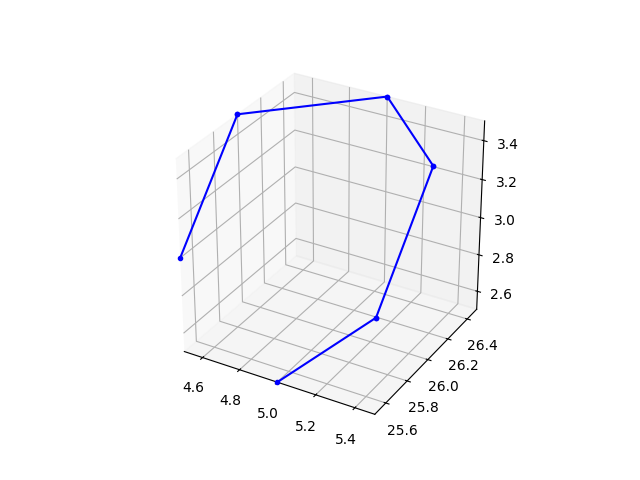

In [21]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_aspect('equal')


cycle = [utils.transform_res_to_point(C.mapping[i]) for i in paths[14]]


X = []
Y = []
Z = []

for i in range(len(cycle)-1):
    edgeX = [[cycle[i][0], cycle[i+1][0]]]
    edgeY = [cycle[i][1], cycle[i+1][1]]
    edgeZ = [cycle[i][2], cycle[i+1][2]]
    ax.plot(edgeX, edgeY, edgeZ, color='b',marker='.')
    X.extend(edgeX)
    Y.extend(edgeY)
    Z.extend(edgeZ)


X = np.array(X)
Y = np.array(Y)
Z = np.array(Z)

max_range = np.array([X.max()-X.min(), Y.max()-Y.min(), Z.max()-Z.min()]).max() / 2.0 

mid_x = (X.max()+X.min()) * 0.5
mid_y = (Y.max()+Y.min()) * 0.5
mid_z = (Z.max()+Z.min()) * 0.5
ax.set_xlim(mid_x - max_range, mid_x + max_range)
ax.set_ylim(mid_y - max_range, mid_y + max_range)
ax.set_zlim(mid_z - max_range, mid_z + max_range)

plt.show()



In [48]:
sum([len(edges) for edges in Blocked_edges_cycles_init]), sum([len(edges) for edges in MIP_blocked_edges])

(4346, 2113)

## Use Romeo on it

In [56]:
unwrapp_romeo = romeo.unwrapp_phase(phase,Blocked_edges_cycles_init+MIP_blocked_edges)
phase.shape


  0%|          | 0/35875 [00:00<?, ?it/s]

100%|██████████| 35875/35875 [00:00<00:00, 664467.49it/s]


(25, 25, 20)

In [53]:
N_romeo = utils.compute_absolute_phase_gradients(unwrapp_romeo,phase)


In [54]:
N_romeo

13219

563

## Scikit learn usage

In [10]:
from skimage.restoration import unwrap_phase

In [11]:
unwrapp_scikit = unwrap_phase(phase)

In [102]:
D = utils.transform_res_to_point(C.mapping[C.open_paths[0][0]])
int(D[0]),int(D[1]),int(D[2])

(1, 21, 6)

## Link the open paths

In [76]:
out_frame = nx.Graph()
X_,Y_,Z_ = 10,10,15

for i in range(X_):
    for j in range(Y_):
        out_frame.add_edge((i,j+1,0),(i,j,0))
        out_frame.add_edge((i+1,j,0),(i,j,0))
        out_frame.add_edge((i,j+1,Z_-1),(i,j,Z_-1))
        out_frame.add_edge((i+1,j,Z_-1),(i,j,Z_-1))




for j in range(Y_):
    for k in range(Z_):
        out_frame.add_edge((0,j,k),(0,j,k+1))
        out_frame.add_edge((X_-1,j,k),(X_-1,j+1,k))
        out_frame.add_edge((0,j,k),(0,j+1,k))
        out_frame.add_edge((X_-1,j,k),(X_-1,j,k+1))

for i in range(X_): 
    for k in range(Z_):
        out_frame.add_edge((i,0,k),(i,0,k+1))
        out_frame.add_edge((i,0,k),(i+1,0,k))
        out_frame.add_edge((i,Y_-1,k),(i+1,Y_-1,k))
        out_frame.add_edge((i,Y_-1,k),(i,Y_-1,k+1))

Nodes = list(out_frame.nodes)
for node in Nodes:
    if node[0] == X_ or node[1] == Y_ or node[2] == Z_:
        out_frame.remove_node(node)





In [78]:

degree_4 = [node for node in out_frame.nodes() if out_frame.degree(node) == 4]
degree_1 = [node for node in out_frame.nodes() if out_frame.degree(node) == 1]
degree_2 = [node for node in out_frame.nodes() if out_frame.degree(node) == 2]
degree_3 = [node for node in out_frame.nodes() if out_frame.degree(node) == 3]

len(degree_1),len(degree_2),len(degree_3),len(degree_4)


(0, 0, 8, 660)

In [84]:
utils.transform_res_to_point(C.mapping[C.open_paths[0][0]])


(1.5, 21.5, 6)

In [12]:
utils.transform_res_to_point(C.mapping[C.open_paths[12][0]])

(12.5, 35.5, 19)

In [93]:
C.open_paths[0].index(28306)

51

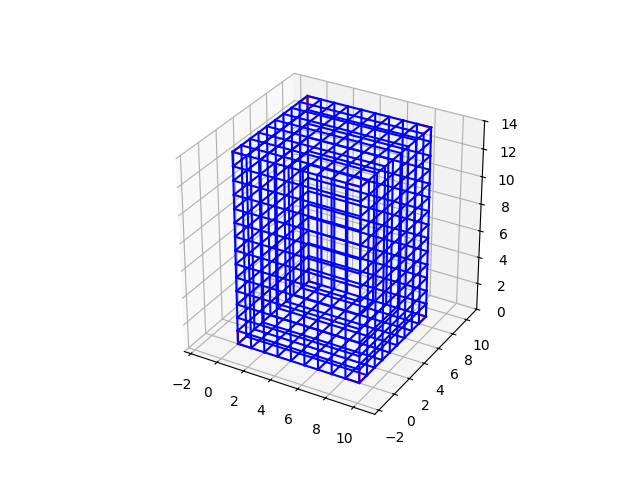

In [77]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_aspect('equal')

X = []
Y = []
Z = []

for edge in out_frame.edges:
    edgeX = [edge[0][0], edge[1][0]]
    edgeY = [edge[0][1], edge[1][1]]
    edgeZ = [edge[0][2], edge[1][2]]
    if out_frame.degree(edge[0]) == 3 or out_frame.degree(edge[1]) == 3:
        ax.plot(edgeX, edgeY, edgeZ, color='r')
    ax.plot(edgeX, edgeY, edgeZ, color='b')
    X.extend(edgeX)
    Y.extend(edgeY)
    Z.extend(edgeZ)

    



X = np.array(X)
Y = np.array(Y)
Z = np.array(Z)

max_range = np.array([X.max()-X.min(), Y.max()-Y.min(), Z.max()-Z.min()]).max() / 2.0 

mid_x = (X.max()+X.min()) * 0.5
mid_y = (Y.max()+Y.min()) * 0.5
mid_z = (Z.max()+Z.min()) * 0.5
ax.set_xlim(mid_x - max_range, mid_x + max_range)
ax.set_ylim(mid_y - max_range, mid_y + max_range)
ax.set_zlim(mid_z - max_range, mid_z + max_range)

plt.show()

